In [1]:
import pandas as pd
import os
import csv
import numpy as np
import datetime

In [81]:
path = "/home/huandong/laurel/tools/release/stock_simulator/sim_result/standalone_0.012"
file_name = "goal_position.csv"
df1 = pd.read_csv(os.path.join(path, file_name), header=None)
file_name = "symbol.csv"
df2 = pd.read_csv(os.path.join(path, file_name), header=None)
file_name = "timestamp.csv"
df3 = pd.read_csv(os.path.join(path, file_name), header=None)
df3[0] = pd.to_datetime(df3[0])

In [82]:
path = '/home/huandong/sim_data'
file_name = "forecast.csv"
df4 = pd.read_csv(os.path.join(path, file_name), header=None)
file_name = "symbol.csv"
df5 = pd.read_csv(os.path.join(path, file_name), header=None)
file_name = "timestamp.csv"
df6 = pd.read_csv(os.path.join(path, file_name), header=None)
df6[0] = pd.to_datetime(df6[0])

In [88]:
t0 = datetime.datetime(2015,7,1,9,30)
pt = []
pos_nums = []
for i in range(1200):
    t0  = t0 + datetime.timedelta(days=1)
    if t0 in list(df3[0]):
        t1_index = df3[df3[0] == t0].index[0]
        pos_tag = df1.loc[t1_index]>0
        goal_pos = list(df1.loc[t1_index][pos_tag])
        pos_nums.append(len(goal_pos))
        pt.append(t0)

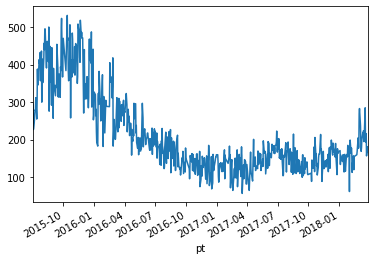

In [89]:
p1 = pd.DataFrame({"pt":pt, "pos_nums":pos_nums})
p1.index = p1["pt"]
p1["pos_nums"].plot()

In [85]:
t = datetime.datetime(2016,1,11,9,30)
t1_index = df3[df3[0] == t].index[0]
pos_tag = df1.loc[t1_index]>0

print(df3[df3[0] == t][0])
goal_symbol = list(df2.loc[pos_tag, 0])
goal_pos = list(df1.loc[t1_index][pos_tag])
print("goal_symbol", goal_symbol)
print("goal_pos", goal_pos)

2210   2016-01-11 09:30:00
Name: 0, dtype: datetime64[ns]
goal_symbol [104060600010, 104060600035, 104060600058, 104060600070, 104060600103, 104060600116, 104060600117, 104060600122, 104060600126, 104060600135, 104060600151, 104060600157, 104060600161, 104060600175, 104060600176, 104060600184, 104060600188, 104060600221, 104060600238, 104060600246, 104060600279, 104060600291, 104060600298, 104060600362, 104060600378, 104060600406, 104060600422, 104060600425, 104060600468, 104060600475, 104060600485, 104060600496, 104060600501, 104060600511, 104060600562, 104060600567, 104060600584, 104060600618, 104060600645, 104060600663, 104060600686, 104060600777, 104060600801, 104060600809, 104060600814, 104060600816, 104060600826, 104060600966, 104060601021, 104060601088, 104060601168, 104060601198, 104060601208, 104060601238, 104060601566, 104060601677, 104060601717, 104060601898, 104060601899, 104060603108, 104060603611, 104060603866, 104060603869, 104060603899, 104060603988, 104070000018, 10407

In [76]:
t2_index  = df6[df6[0] == t].index[0]
print(df6[df6[0] == t][0])
sorted_forecast_df = df4.loc[t2_index].sort_values(ascending=False)
sorted_symbolindex_byforecast = list(sorted_forecast_df.index)
sorted_forecast = list(sorted_forecast_df)
sorted_symbol_byforecast = list(df5.loc[sorted_symbolindex_byforecast][0])
print(len(goal_symbol))
res = 0
tag = []
for i in range(len(sorted_symbol_byforecast)):
    for j in range(len(goal_symbol)):
        if goal_symbol[j] == sorted_symbol_byforecast[i]:
            res = res + 1
            print("~~~~~~~~~~~~~~~~~~~~~~~~", i, sorted_forecast[i], goal_pos[j], goal_symbol[j], res)
            tag.append(goal_symbol[j])

150   2016-01-11 09:30:00
Name: 0, dtype: datetime64[ns]
183
~~~~~~~~~~~~~~~~~~~~~~~~ 0 1.2757042791669102 6900 104070300426 1
~~~~~~~~~~~~~~~~~~~~~~~~ 1 1.1026441004101963 10000 104060603611 2
~~~~~~~~~~~~~~~~~~~~~~~~ 2 1.0859394218747351 6100 104070300310 3
~~~~~~~~~~~~~~~~~~~~~~~~ 4 1.0835083868329258 24100 104070002355 4
~~~~~~~~~~~~~~~~~~~~~~~~ 5 1.0487543489758702 23100 104060600663 5
~~~~~~~~~~~~~~~~~~~~~~~~ 6 1.0429605390851229 19200 104060600485 6
~~~~~~~~~~~~~~~~~~~~~~~~ 7 1.0409608032529087 27200 104060600826 7
~~~~~~~~~~~~~~~~~~~~~~~~ 8 1.0106972601239417 8700 104070000018 8
~~~~~~~~~~~~~~~~~~~~~~~~ 9 0.9847742464368076 10500 104060603899 9
~~~~~~~~~~~~~~~~~~~~~~~~ 10 0.98364044688389 3000 104070300466 10
~~~~~~~~~~~~~~~~~~~~~~~~ 11 0.9570522453610628 2300 104070300465 11
~~~~~~~~~~~~~~~~~~~~~~~~ 12 0.9551801826779576 3000 104060603108 12
~~~~~~~~~~~~~~~~~~~~~~~~ 13 0.94417990706608 2600 104070300409 13
~~~~~~~~~~~~~~~~~~~~~~~~ 14 0.9379799511258334 9300 104070002560 14
~~~

In [31]:
q = list(set(goal_symbol) - set(tag))
for i in q:
    for j in range(len(goal_symbol)):
        if i == goal_symbol[j]:
            print(i, goal_pos[j])

In [77]:
path = "/home/huandong/laurel/tools/release/stock_simulator/sim_result/standalone_0.004"
file_name = "gross_pnl.csv"
df7 = pd.read_csv(os.path.join(path, file_name), header=None)

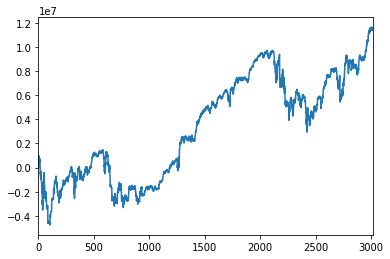

In [78]:
c = df7.columns
df7[c[:-46]].sum(axis=1).cumsum().plot()

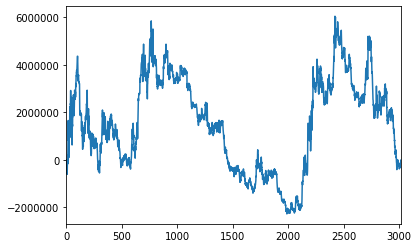

In [79]:
c = df7.columns
df7[c[-46:-43]].sum(axis=1).cumsum().plot()

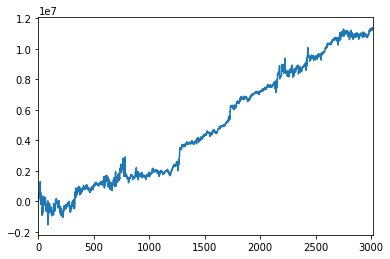

In [80]:
df7.sum(axis=1).cumsum().plot()

In [33]:
df5[df5[0] == 104070002252  ]

,0
2196,104070002252


In [34]:
df6[df6[0] == t]

,0
70,2015-09-11 09:30:00


In [35]:
df4.loc[70,2196]

-0.2856474172087655